<a href="https://colab.research.google.com/github/SumaSrija/Tensorflow-Class-Notes/blob/main/TensorFlow_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

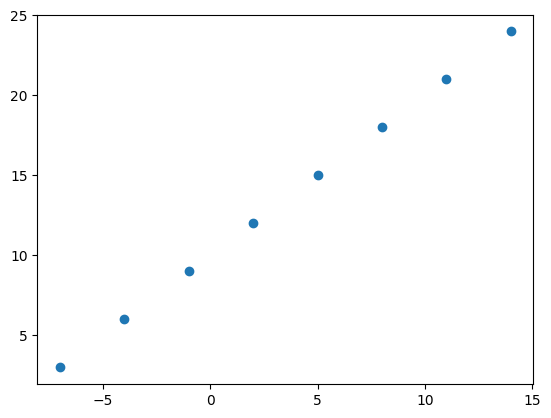

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
Y = np.array([3, 6, 9, 12, 15, 18, 21, 24])
plt.scatter(X, Y)

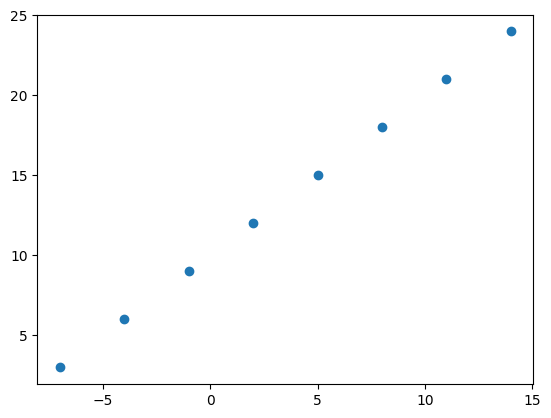

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
Y = tf.constant([3, 6, 9, 12, 15, 18, 21, 24])
plt.scatter(X, Y)

In [ ]:
import tensorflow as tf

2.15.0
4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


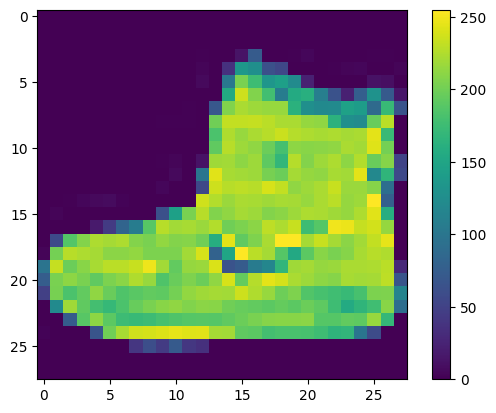

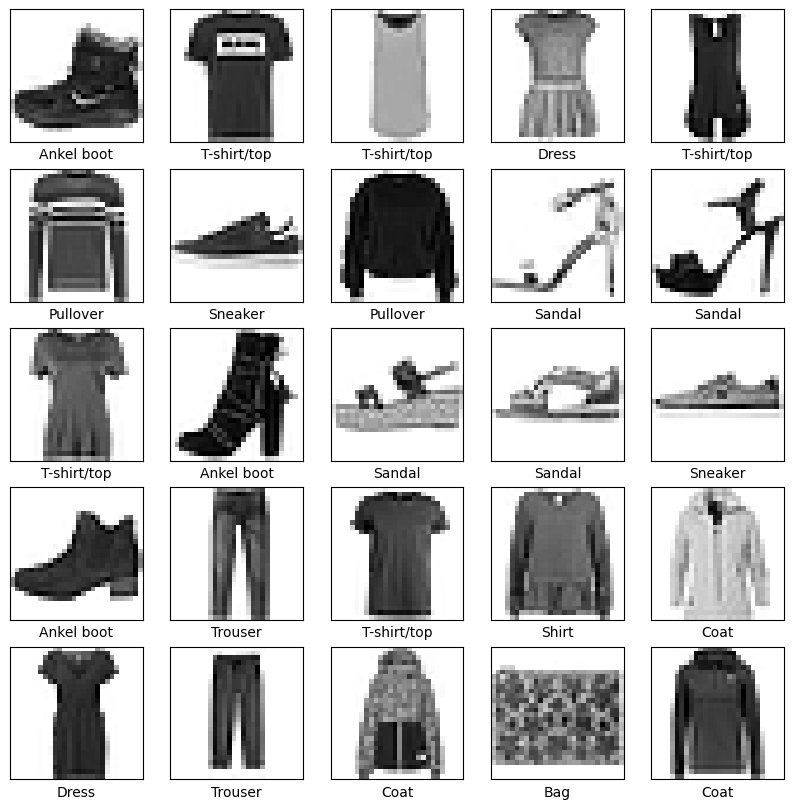

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+ 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
#we can use sgd in place of adam. But, best to use adam
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5004 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3756 - accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3354 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3137 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2939 - accuracy: 0.8916
313/313 - 1s - loss: 0.3444 - accuracy: 0.8774 - 615ms/epoch - 2ms/step

Test accuracy: 0.8773999810218811


In [ ]:
#Variable
INPUT_SHAPE = (28, 28,1)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

model1 = tf.keras.Sequential([
   tf.keras.layers.Conv2D(FILTER1_SIZE, FILTER_SHAPE,activation='relu', input_shape = INPUT_SHAPE),

    tf.keras.layers.MaxPool2D(POOL_SHAPE),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(10)])
model1.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model1.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4445 - accuracy: 0.8444
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3180 - accuracy: 0.8880
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2816 - accuracy: 0.9003
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2589 - accuracy: 0.9091
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2390 - accuracy: 0.9156
313/313 - 1s - loss: 0.2870 - accuracy: 0.8940 - 1s/epoch - 5ms/step

Test accuracy: 0.8939999938011169


CNN Dogs vs. Cat

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+ 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
def cnn_vgg(input_shape):
  model = Sequential()
  model.add(VGG16(weights='imagenet', include_top=False, input_shape=input_shape))
  model.add(Flatten())
  model.add(m )

VGG16 transfer learning Cat vs dog CNN model


1.load package

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import urllib.request

import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,Conv2D, MaxPooling2D,GlobalMaxPooling2D
from keras.optimizers import Adam
from keras.models import Model
from keras import optimizers

urllib.request.urlretrieve("https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip", "cat_dog.zip")
#zip = ZipFile('cat_dog.zip')
#zip.extractall()

import zipfile
zip_ref = zipfile.ZipFile('cat_dog.zip', 'r')
zip_ref.extractall('../output/')
zip_ref.close()

import os
os.listdir('../output/PetImages')

print('total  dog images :', len(os.listdir('../output/PetImages/Dog') ))
print('total  cat images :', len(os.listdir('../output/PetImages/Cat') ))

os.remove('../output/PetImages/Cat/666.jpg')
os.remove('../output/PetImages/Dog/11702.jpg')

os.listdir('../output/PetImages/Dog')[1:10]

image = load_img('../output/PetImages/Dog/4644.jpg')
plt.imshow(image)

os.listdir('../output/PetImages/Cat')[1:10]

image = load_img('../output/PetImages/Cat/8962.jpg')
plt.imshow(image)

img_width=150
img_height=150
batch_size=20
input_shape = (img_width, img_height, 3)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.3,
    zoom_range=[0.6,1.0],
    brightness_range=[0.6,1.0],
    rotation_range=90,
    horizontal_flip=True,
    validation_split=0.2
)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    '../output/PetImages',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    seed = 42,
    subset='training'

)
valid_generator = train_datagen.flow_from_directory(
    '../output/PetImages',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    #class_mode='binary',
    class_mode='categorical',
    seed = 42,
    subset='validation'

)
#X, y = next(train_generator)
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()
####################### VGG16
from keras.applications import VGG16
pre_trained_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
pre_trained_model.summary()

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
#x = Dense(1, activation='sigmoid')(x)
x = Dense(2, activation='softmax')(x)
model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['acc'])

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
#earlystop = EarlyStopping(patience=5)
earlystop=EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, verbose=0, mode='auto')
callbacks = [earlystop]

history = model.fit_generator(
            train_generator,
            validation_data = valid_generator,
            steps_per_epoch = 100,
            epochs = 50,
            validation_steps = 50,
            verbose = 1
            ,callbacks=callbacks
)

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
#plt.plot  ( epochs,     loss )
#plt.plot  ( epochs, val_loss )
#plt.title ('Training and validation loss'   )



HTTPError: HTTP Error 404: Not Found

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds

dataset_name = "oxford_flowers102"
ds_train, ds_info = tfds.load(name=dataset_name, split="train", with_info=True)

IMG_SIZE = 224
NUM_CLASSES = ds_info.features["label"].num_classes

def preprocess_data(data):
    image = tf.image.resize(data['image'], (IMG_SIZE, IMG_SIZE))
    label = data['label']
    return image, label

ds_train = ds_train.map(preprocess_data)
ds_train = ds_train.shuffle(buffer_size=10000).batch(32)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(ds_train, epochs=10)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteBA720I/oxford_flowers102-train.tfrecord*…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteBA720I/oxford_flowers102-test.tfrecord*.…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteBA720I/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
Epoch 1/10
32/32 [==============================] - 144s 4s/step - loss: 70.7051 - accuracy: 0.0039
Epoch 2/10
32/32 [==============================] - 124s 4s/step - loss: 4.4470 - accuracy: 0.0863
Epoch 3/10
32/32 [==============================] - 116s 4s/step - loss: 3.3205 - accuracy: 0.3382
Epoch 4/10
32/32 [==============================] - 117s 4s/step - loss: 1.6095 - accuracy: 0.6824
Epoch 5/10
32/32 [==============================] - 117s 4s/step - loss: 0.7749 - accuracy: 0.8578
Epoch 6/10
32/32 [==============================] - 115s 4s/step - loss: 0.5151 - accuracy: 0.9216
Epoch 7/10
32/32 [==============================] - 128s 4s/step - loss: 0.3833 - accuracy: 0.9343
Epoch 8/10
32/32 [==============================] - 116s 4s/step - loss: 0.3533 - accuracy: 0.9431
Epoch 9/10
32/32 [==============================] - 116s 4s/step